# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
We Will Study The Movie DataBase According To The Following :<br>
1- Top 10 Movies By Popularity<br>
2- Bottom 10 Movies By Popularity<br>
3- Top Movie Each Year By Popularity<br>
4- relation between budget,revenue and popularity<br>\
5- Basic Statistics has been provided for budget and revenue and popularity<br>


In [36]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
def get_univariant_stat(df,fields_name):
    df[fields_name].describe()

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Some data are missing form <b>budget , budget_adj , revenue , revenue_adj</b> Fields<br>
The missing values have been filled with the average value of each year to provide more realistic number that is relative to the year movie was created<br>


In [37]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

In [38]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

def replace_zeros_by_avg_yearly(field_name):
    df_mean_by_year=df[['release_year',field_name]].where(df[field_name]>0).groupby('release_year').mean()
    for i in df.index:
    #print(str(df.at[i,'budget']) + "\t\t" + str(df.at[i,'release_year']))
        if df.at[i,field_name]==0:
            df.at[i,field_name]=df_mean_by_year.at[df.at[i,'release_year'],field_name]
            
    #df[['release_year',field_name]].apply(lambda value: df_mean_by_year.at[df['release_year'],df[field_name]] if value.name==field_name and value==0 else value)

#Replace Zeros In Budget Column By Using The Average Of Each Year
replace_zeros_by_avg_yearly('budget')
#----------------------------------------------------------------------------------------------------------
#Replace Zeros In revenue Column By Using The Average Of Each Year
replace_zeros_by_avg_yearly('revenue')
#----------------------------------------------------------------------------------------------------------
#Replace Zeros In budget_adj Column By Using The Average Of Each Year
replace_zeros_by_avg_yearly('budget_adj')       
#----------------------------------------------------------------------------------------------------------
#Replace Zeros In revenue_adj Column By Using The Average Of Each Year
replace_zeros_by_avg_yearly('revenue_adj') 
#----------------------------------------------------------------------------------------------------------
#Replace Zeros In popularity Column By Using The Average Of Each Year
replace_zeros_by_avg_yearly('popularity') 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Top 10 Movies By Popularity)

<AxesSubplot:title={'center':'Top 10 Movies'}, xlabel='Movie Title', ylabel='Popularity'>

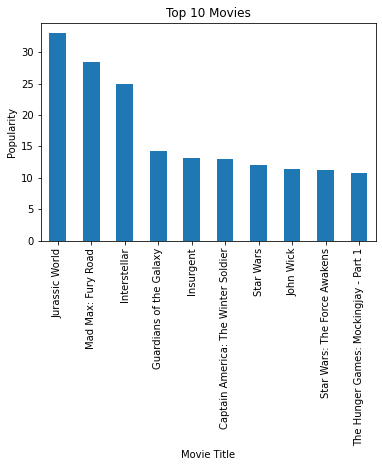

In [39]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_top_10_by_rating=df.sort_values(by="popularity" , ascending=False)[0:10]
df_top_10_by_rating.set_index('original_title',inplace=True, drop=True)
df_top_10_by_rating['popularity'].plot.bar(title='Top 10 Movies',xlabel="Movie Title",ylabel="Popularity")

#### Here we notice the top 10 movies according to popularity

#### The Revenue of The Top 10 Movies are:

<AxesSubplot:title={'center':'Distribution of Top 10 movies according to revenue'}, ylabel='Revenue'>

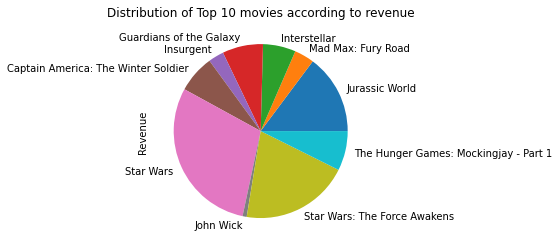

In [40]:
df_top_10_by_rating['revenue_adj'].plot.pie(title='Distribution of Top 10 movies according to revenue',ylabel='Revenue')

#### Distribution of Top 10 movies according to revenue

### Research Question 2  (Bottom 10 Movies By Popularity)

<AxesSubplot:title={'center':'Bottom 10 Movies'}, xlabel='Movie Title', ylabel='Popularity'>

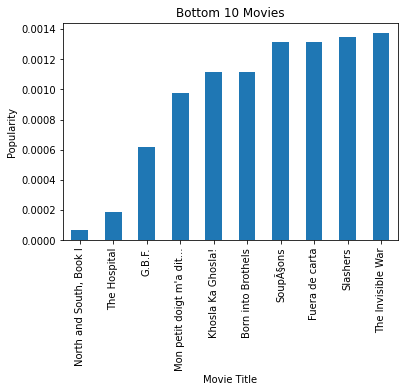

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_bottom_10_by_rating=df.sort_values(by="popularity" , ascending=True)[0:10]
df_bottom_10_by_rating.set_index('original_title',inplace=True, drop=True)
df_bottom_10_by_rating['popularity'].plot.bar(title='Bottom 10 Movies',xlabel="Movie Title",ylabel="Popularity")

#### Here we notice the Bottom 10 movies according to popularity

#### The Revenue of The Bottom 10 Movies are:

<AxesSubplot:title={'center':'Distribution of Bottom 10 movies according to revenue'}, ylabel='Revenue'>

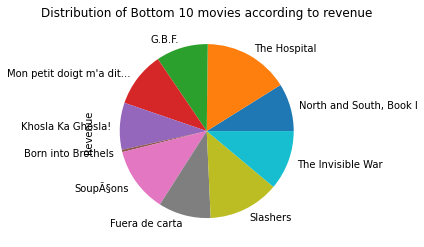

In [42]:
df_bottom_10_by_rating['revenue_adj'].plot.pie(title='Distribution of Bottom 10 movies according to revenue',ylabel='Revenue')

#### Distribution of Bottom 10 movies according to revenue

### Research Question 3  (Top Movie Each Year By Popularity)

In [43]:
df_top_pop_each_year=df[['release_year','popularity']].groupby(["release_year"]).max()
for i in df_top_pop_each_year.index:
    filter1=df['release_year']==i
    filter2=df['popularity']==df_top_pop_each_year.at[i,'popularity']
    
    movie_name=df.loc[filter1 & filter2,'original_title']
    
    df_top_pop_each_year.loc[i,'movie_name']=movie_name.iloc[0]
    
    
df_top_pop_each_year

,popularity,movie_name
release_year,,
1960,2.610362,Psycho
1961,2.631987,One Hundred and One Dalmatians
1962,3.170651,Dr. No
1963,2.508235,From Russia With Love
1964,3.153791,Goldfinger
1965,1.910465,Thunderball
1966,1.227582,How the Grinch Stole Christmas!
1967,2.550704,The Jungle Book
1968,3.309196,2001: A Space Odyssey


#### Research Question 4  (relation between budget,revenue and popularity)

<AxesSubplot:title={'center':'Budget Against Revenue'}, xlabel='Revenue', ylabel='Budget'>

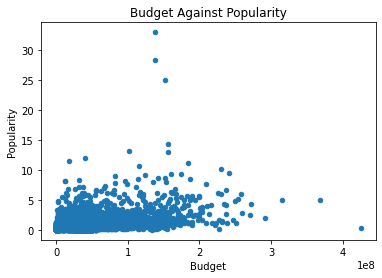

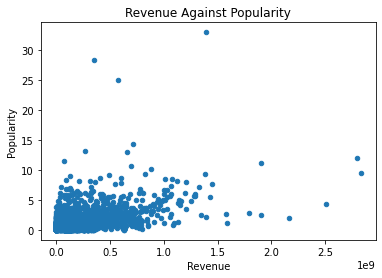

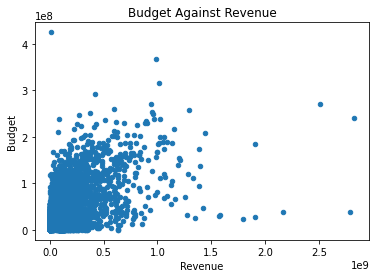

In [44]:
df[['popularity','budget_adj']].plot.scatter(y='popularity',x='budget_adj',title='Budget Against Popularity',xlabel='Budget',ylabel='Popularity')
df[['popularity','revenue_adj']].plot.scatter(y='popularity',x='revenue_adj',title='Revenue Against Popularity',xlabel='Revenue',ylabel='Popularity')
df[['budget_adj','revenue_adj']].plot.scatter(y='budget_adj',x='revenue_adj',title='Budget Against Revenue',xlabel='Revenue',ylabel='Budget')

#### Research Question 5  (Basic Information about budget and revenue)

In [45]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dff=df.rename(columns={"budget_adj": "budget_", "revenue_adj": "revenue_"})
dff[['budget_','revenue_','popularity']].describe()

,budget_,revenue_,popularity
count,10866.00,10866.00,10866.00
mean,35918613.71,118508681.81,0.65
std,29496338.93,139393835.18,1.00
min,0.92,2.37,0.00
25%,21528767.11,58777320.38,0.21
50%,33241049.85,100228759.47,0.38
75%,39609863.43,119978941.34,0.71
max,425000000.00,2827123750.41,32.99


<a id='conclusions'></a>
## Conclusions
### Information about datasource
<br>The Results are based on the whole sample from the database provided
<br>Some data were missing from budget and revenue so i replaced it with mean values of each year
### Findings Are As Follows:
<br>1- there is a positive relationship between money spent and money earned
<br>2- there is no clear relationship between popularity and neither of budget nor revenue
<br>3- top popular movie per year is shown above
<br>4- top 10 popular is shown above
<br>5- bottom 10 popular is shown above
